In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
url = "https://solvei8-aiml-assignment.s3.ap-southeast-1.amazonaws.com/hotel_bookings.csv"
df = pd.read_csv(url)

# Step 3: Initial Overview
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nSample Rows:\n", df.head())

# Step 4: Missing Value Check
print("\nMissing Values:\n", df.isnull().sum())

# Step 5: Drop irrelevant columns (optional based on analysis)
# Example: 'agent' and 'company' have many nulls. You can decide to drop or impute.
df.drop(['agent', 'company', 'reservation_status_date'], axis=1, inplace=True)

# Step 6: Handle missing values
# Fill NA for 'children' with 0
df['children'].fillna(0, inplace=True)

# Check again
print("\nMissing after cleaning:\n", df.isnull().sum())

# Step 7: Convert date columns
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'] + '-' +
                                    df['arrival_date_day_of_month'].astype(str),
                                    format='%Y-%B-%d')

# Drop individual date components
df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',
         'arrival_date_week_number', 'arrival_date_day_of_month'], axis=1, inplace=True)

# Step 8: Standardize column names (optional)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 9: Save preprocessed data
df.to_csv("cleaned_hotel_bookings.csv", index=False)
print("\n✅ Data preprocessing complete. Cleaned data saved as 'cleaned_hotel_bookings.csv'")


Dataset Shape: (119390, 32)

Column Names: ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']

Sample Rows:
           hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   

<ipython-input-1-223c1426302f>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)



Missing after cleaning:
 hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                     

<ipython-input-3-5b2ec6399927>:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


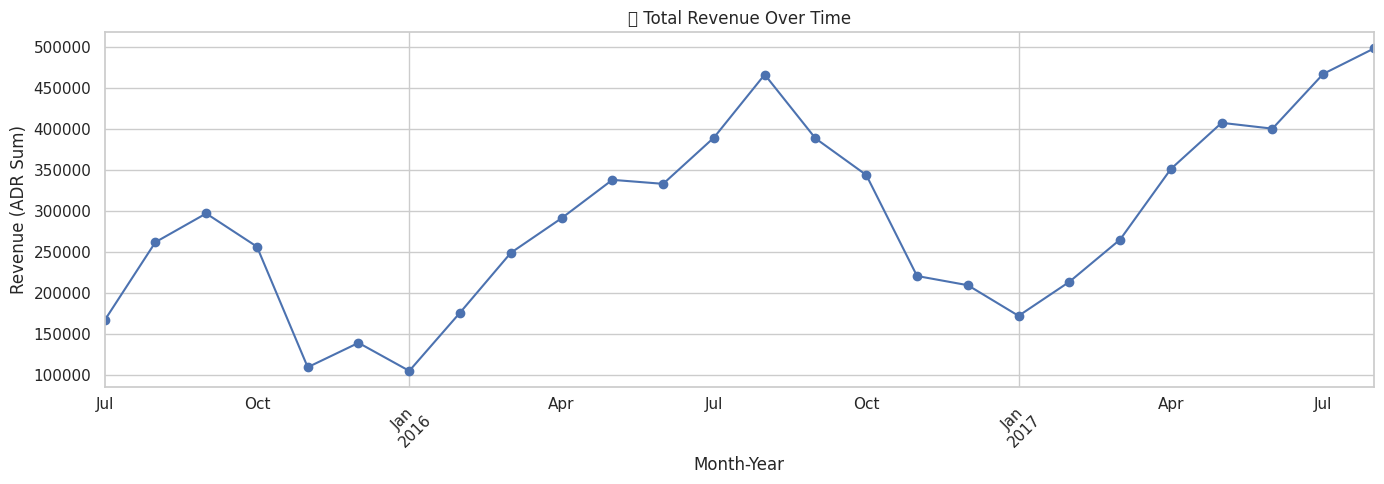

❌ Cancellation Rate: 37.04%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


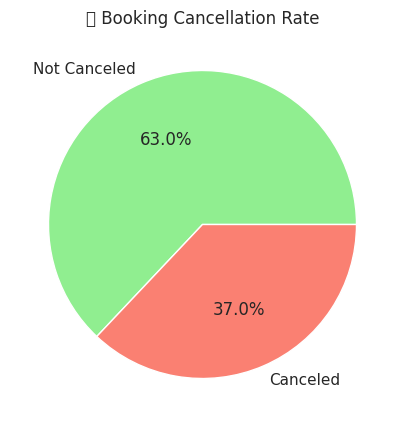

<ipython-input-3-5b2ec6399927>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


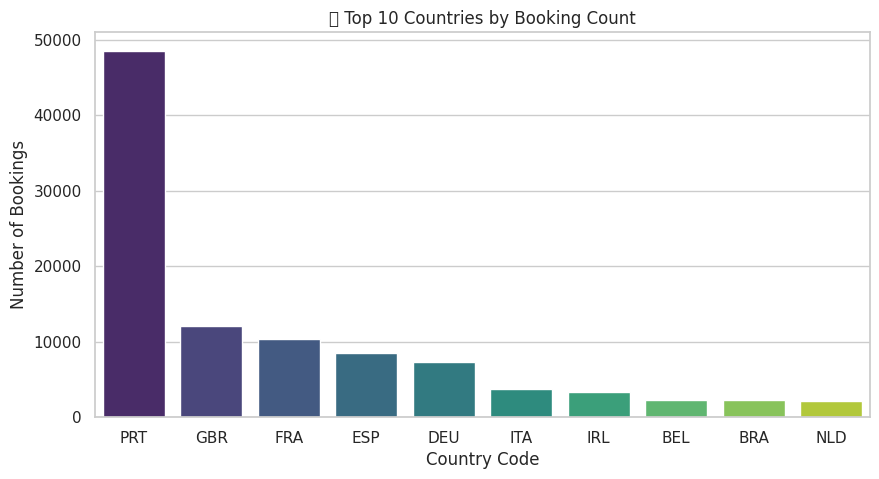

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


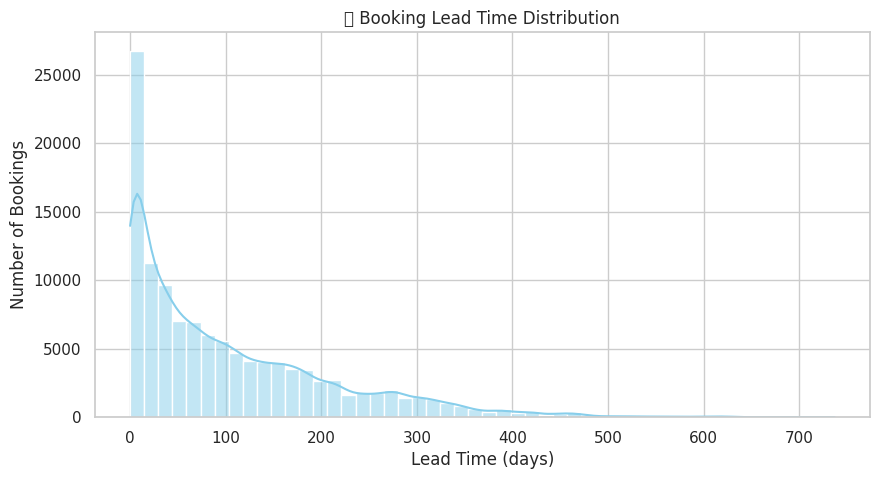

🏨 Average Stay Duration: 3.43 nights


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127976 (\N{HOTEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


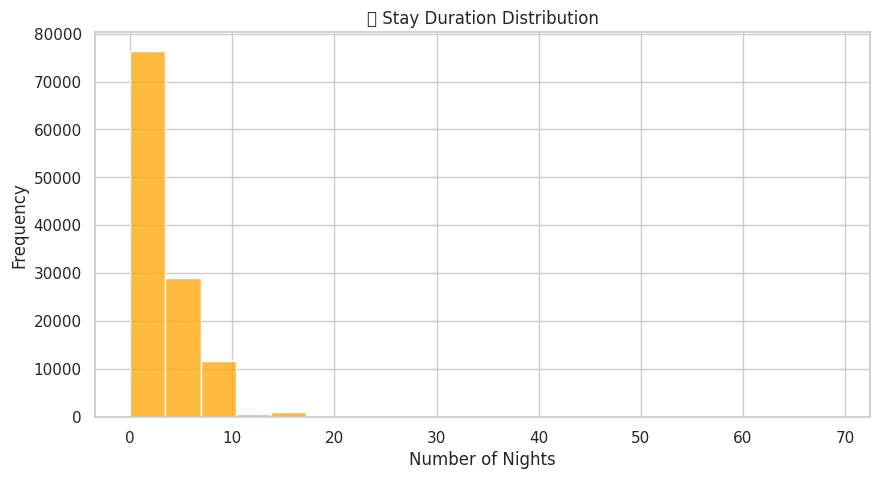

In [3]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Cleaned Data
df = pd.read_csv("cleaned_hotel_bookings.csv")

# Step 3: Create Combined Date Column if Not Already Created
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')


# Set default plotting style
sns.set(style="whitegrid")

# 1️⃣ Revenue Trends Over Time
revenue_df = df[df['is_canceled'] == 0].copy()
revenue_df['month_year'] = revenue_df['arrival_date'].dt.to_period('M')
monthly_revenue = revenue_df.groupby('month_year')['adr'].sum()

plt.figure(figsize=(14, 5))
monthly_revenue.plot(kind='line', marker='o')
plt.title("📊 Total Revenue Over Time")
plt.ylabel("Revenue (ADR Sum)")
plt.xlabel("Month-Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2️⃣ Cancellation Rate (% of Total Bookings)
cancel_rate = df['is_canceled'].mean() * 100
print(f"❌ Cancellation Rate: {cancel_rate:.2f}%")

# Pie chart for canceled vs not canceled
plt.figure(figsize=(5, 5))
df['is_canceled'].value_counts().plot.pie(labels=["Not Canceled", "Canceled"],
                                           autopct='%1.1f%%', colors=["lightgreen", "salmon"])
plt.title("❌ Booking Cancellation Rate")
plt.ylabel("")
plt.show()

# 3️⃣ Geographical Distribution of Users
country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")
plt.title("🌍 Top 10 Countries by Booking Count")
plt.ylabel("Number of Bookings")
plt.xlabel("Country Code")
plt.show()

# 4️⃣ Booking Lead Time Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['lead_time'], bins=50, kde=True, color="skyblue")
plt.title("⏳ Booking Lead Time Distribution")
plt.xlabel("Lead Time (days)")
plt.ylabel("Number of Bookings")
plt.show()

# 5️⃣ Extra (Optional) – Average Stay Duration
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
avg_stay = df['stay_duration'].mean()
print(f"🏨 Average Stay Duration: {avg_stay:.2f} nights")

plt.figure(figsize=(10, 5))
sns.histplot(df['stay_duration'], bins=20, color="orange")
plt.title("🏨 Stay Duration Distribution")
plt.xlabel("Number of Nights")
plt.ylabel("Frequency")
plt.show()


In [17]:
import pandas as pd
import os
from langchain.chat_models import ChatOpenAI
from langchain_experimental.agents import create_pandas_dataframe_agent

# ✅ Set your OpenRouter API key and base URL
os.environ["OPENAI_API_KEY"] = "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"
os.environ["OPENAI_API_BASE"] = "https://openrouter.ai/api/v1"

# 📥 Load cleaned hotel booking data
df = pd.read_csv("cleaned_hotel_bookings.csv")

# 🤖 Use OpenRouter model (you can also try: mistralai/mistral-7b-instruct)
llm = ChatOpenAI(
    model="openai/gpt-3.5-turbo",
    temperature=0
)

# 🔍 Create a Pandas DataFrame Agent
agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=True,
    allow_dangerous_code=True
)

# ❓ Ask a natural language question
response = agent.run("What is the average lead time for bookings?")
print("\n🔍 Answer:", response)



<ipython-input-17-791f63bbd2cb>:14: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(




> Entering new AgentExecutor chain...
Thought: To find the average lead time, we need to calculate the mean of the 'lead_time' column in the dataframe.
Action: python_repl_ast
Action Input: df['lead_time'].mean()104.01141636652986The average lead time for bookings is approximately 104.01 days.
Final Answer: 104.01 days

> Finished chain.

🔍 Answer: 104.01 days


In [18]:
import os
import pandas as pd

data = {
    "hotel": ["City Hotel", "Resort Hotel", "City Hotel"],
    "lead_time": [342, 737, 7],
    "arrival_date_year": [2017, 2016, 2018],
    "arrival_date_month": ["July", "August", "January"],
    "stays_in_weekend_nights": [0, 1, 2],
    "stays_in_week_nights": [3, 4, 2],
    "adults": [2, 2, 1],
    "children": [0, 1, 0],
    "booking_changes": [3, 0, 1]
}

df = pd.DataFrame(data)

# Save to the data folder
os.makedirs("data", exist_ok=True)
df.to_csv("data/cleaned_hotel_bookings.csv", index=False)

print("CSV file created successfully!")


CSV file created successfully!


In [19]:
df = pd.read_csv("data/cleaned_hotel_bookings.csv")


In [20]:
df.head()


,hotel,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,booking_changes
0,City Hotel,342,2017,July,0,3,2,0,3
1,Resort Hotel,737,2016,August,1,4,2,1,0
2,City Hotel,7,2018,January,2,2,1,0,1
